In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import numpy as np

In [34]:
df = pd.read_csv('C:/Users/Admin/OneDrive/Documents/GuidedProject_Reagile-Motsepe/Student_performance_data .csv')

df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [46]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


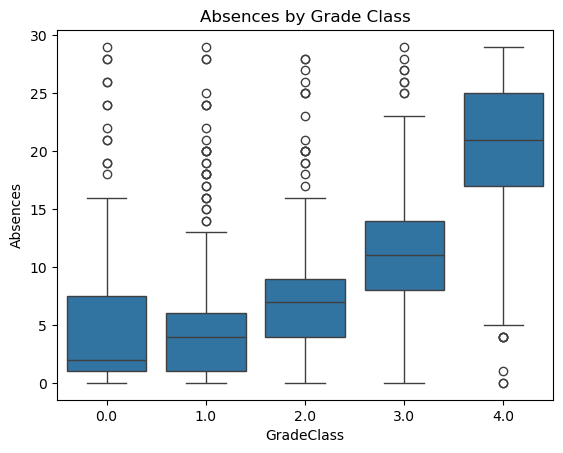

In [ ]:
sns.boxplot(x='GradeClass', y='Absences', data=df)
plt.title('Absences by Grade Class')
plt.tight_layout
plt.show()

StudyTimeWeekly - Number of outliers: 0
Absences - Number of outliers: 0
GPA - Number of outliers: 0


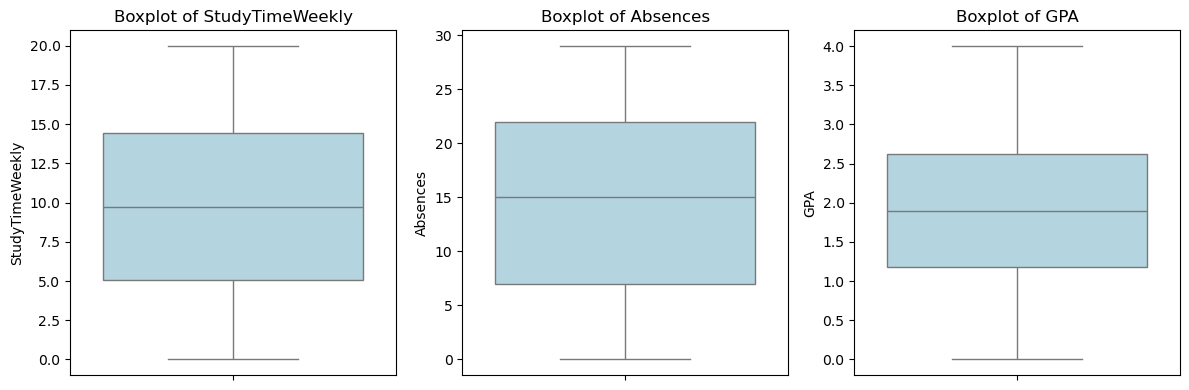

In [47]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), outliers

# Check outliers for continuous variables
continuous_vars = ['StudyTimeWeekly', 'Absences', 'GPA']
for var in continuous_vars:
    count, outliers = detect_outliers(df, var)
    print(f"{var} - Number of outliers: {count}")

# Visualize outliers with boxplots
plt.figure(figsize=(12, 4))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[var], color='lightblue')
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [49]:
# Cap GPA outliers
gpa_lower = df['GPA'].quantile(0.01)
gpa_upper = df['GPA'].quantile(0.99)
df['GPA'] = df['GPA'].clip(lower=gpa_lower, upper=gpa_upper)

# Verify capping
print("GPA after capping:")
print(df['GPA'].describe())

GPA after capping:
count    2392.000000
mean        1.905612
std         0.909947
min         0.111521
25%         1.174803
50%         1.893393
75%         2.622216
max         3.748511
Name: GPA, dtype: float64


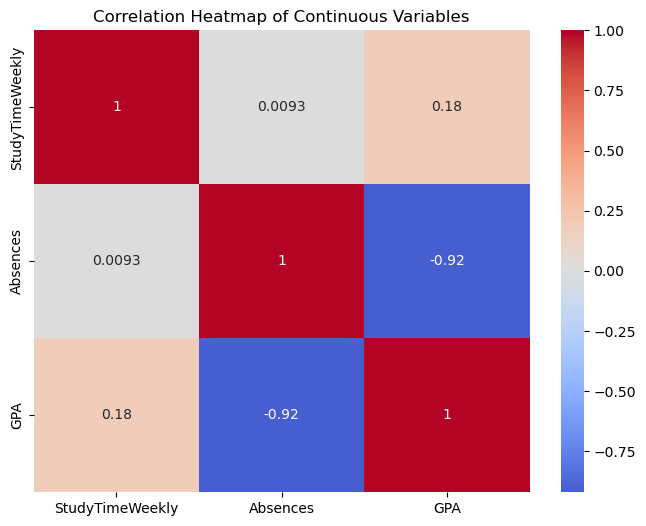

In [50]:
# Correlation matrix
corr_matrix = df[['StudyTimeWeekly', 'Absences', 'GPA']].corr()

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

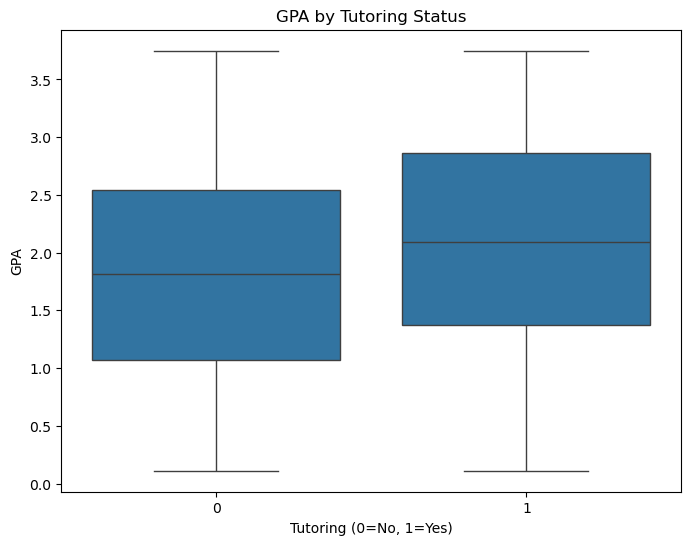

In [74]:
fig = px.scatter(df, x='StudyTimeWeekly', y='GPA', color='GradeClass',
                 title='Study Time vs. GPA by Grade Class',
                 labels={'StudyTimeWeekly': 'Weekly Study Time (Hours)', 'GPA': 'Grade Point Average'},
                 color_continuous_scale='Viridis')
fig.update_layout(showlegend=True)
fig.show()

# Box plot: GPA by Tutoring Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tutoring', y='GPA', data=df)
plt.title('GPA by Tutoring Status')
plt.xlabel('Tutoring (0=No, 1=Yes)')
plt.ylabel('GPA')
plt.show()

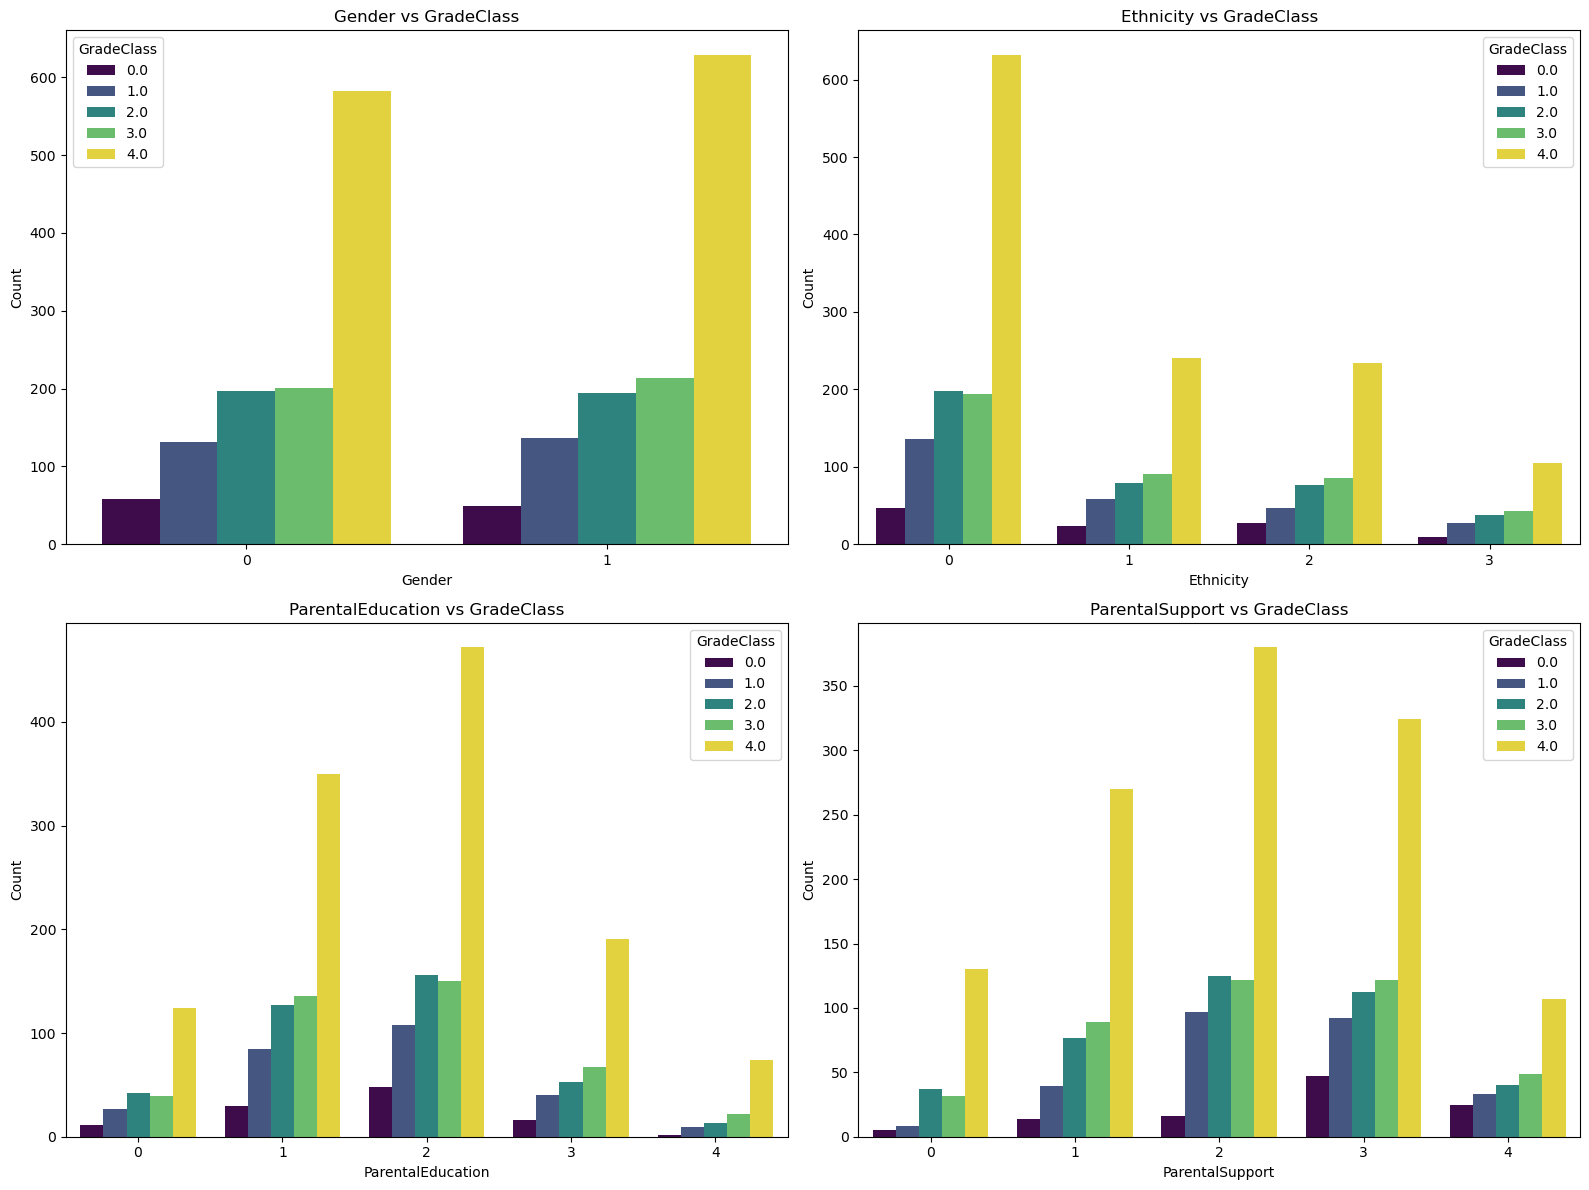

In [33]:
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport']

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='GradeClass', palette='viridis')
    plt.title(f'{col} vs GradeClass')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='GradeClass')

plt.tight_layout()
plt.show()

In [45]:
pd.crosstab(df['GradeClass'], [df['Extracurricular'], df['Sports'], df['Music'], df['Volunteering']])

Extracurricular    0                                 1                      \
Sports             0                1                0               1       
Music              0       1        0       1        0       1       0       
Volunteering       0   1   0   1    0   1   0   1    0   1   0   1   0   1   
GradeClass                                                                   
0.0               26   1   6   2    9   3   4   1   23   5   4   2  18   1   
1.0               61  10  20   4   31   8  16   6   55   8  16   3  22   4   
2.0              109  19  26   9   48   6  12   0   87  10  16   5  32   7   
3.0              119  24  35   5   63  13   5   1   66  12  26   1  33   3   
4.0              364  81  87  13  164  19  35  10  210  39  47  10  85  23   

Extracurricular         
Sports                  
Music             1     
Volunteering      0  1  
GradeClass              
0.0               2  0  
1.0               4  1  
2.0               3  2  
3.0               7  1  
4.0              20  4

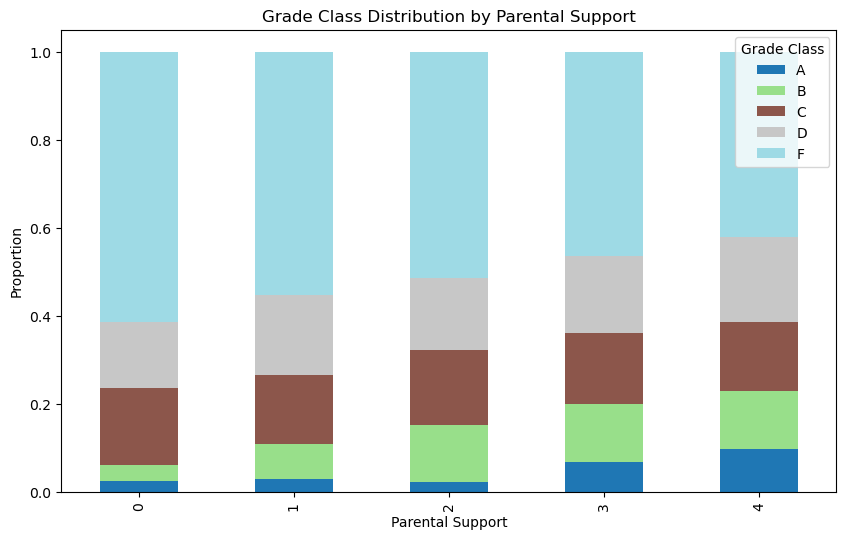

In [56]:
# Stacked bar plot: GradeClass distribution by ParentalSupport
pivot_table = pd.crosstab(df['ParentalSupport'], df['GradeClass'], normalize='index')
pivot_table.plot(kind='bar', stacked=True, cmap='tab20', figsize=(10, 6))
plt.title('Grade Class Distribution by Parental Support')
plt.xlabel('Parental Support')
plt.ylabel('Proportion')
plt.legend(title='Grade Class', labels=['A', 'B', 'C', 'D', 'F'])
plt.show()

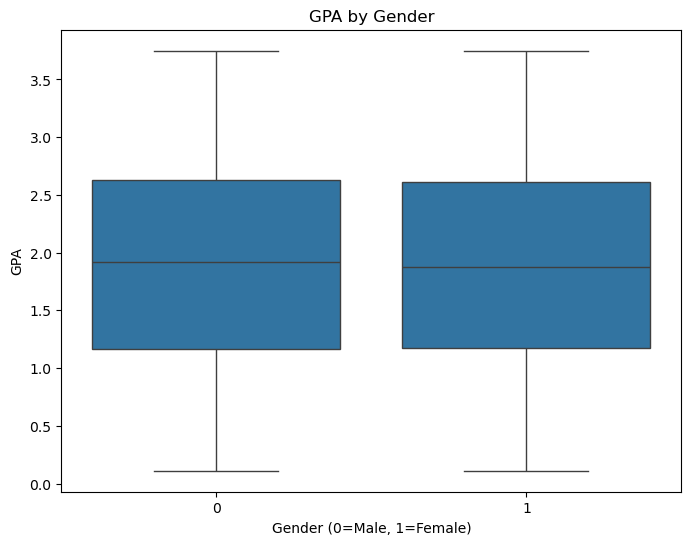

In [72]:
# Box plot: GPA by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='GPA', data=df)
plt.title('GPA by Gender')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('GPA')
plt.show()
